In [2]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import re
from scipy.stats import pearsonr, median_abs_deviation

from pathlib import Path

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet, cut_tree
from scipy.spatial.distance import pdist
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn import metrics
import sys
sys.setrecursionlimit(10000)
import os

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# final ivt vs native
CBF5GAL = "modification_calls/20190610_R941_CBF5GAL.csv"
CBF5GLU = "modification_calls/20190611_R941_CBF5GLU.csv"
NOP58GAL = "modification_calls/20190617_R941_NOP58GAL.csv"
NOP58GLU = "modification_calls/20190619_R941_NOP58GLU.csv"
IVT = "modification_calls/20191014_R941_IVT.csv"
mutant448 = "modification_calls/20210405_R941_mutant448.csv"
WT_YPD = "modification_calls/20210410_R941_WT_YPD.csv"
WT_KOAC = "modification_calls/20210412_R941_WT_KOAC.csv"
mutant452 = "modification_calls/20210413_R941_mutant452.csv"
WT_CY = "modification_calls/20210414_R941_WT_CY.csv"
mutant451 = "modification_calls/20210415_R941_mutant451.csv"
WT_PB = "modification_calls/20210520_R941_WT_PB.csv"
WT_stationary = "modification_calls/20210521_R941_WT_stationary.csv"
Dbp3d_YPD = "modification_calls/20210527_R941_Dbp3d_YPD.csv"
trl1d_YPD = "modification_calls/20210528_R941_trl1d_YPD.csv"
WT_rapa5 = "modification_calls/20210531_R941_WT_rapa5.csv"
Mix = "modification_calls/20210618_R941_Mix.csv"
prp43 = "modification_calls/20210619_R941_prp43.csv"
MIX_2 = "modification_calls/20210716_R941_MIX.csv"
YS603_18_YEPD = "modification_calls/20210717_R941_YS603_18_YEPD.csv"
prp16_18deg_YPD = "modification_calls/20210719_R941_prp16_18deg_YPD.csv"
spp382_YPD = "modification_calls/20210720_R941_spp382_YPD.csv"
R941_YS602_18_YPD = "modification_calls/20210722_R941_R941_YS602_18_YPD.csv"
dbr1d_YPD = "modification_calls/20210729_R941_dbr1d_YPD.csv"
sqs1d_YPD = "modification_calls/20210730_R941_sqs1d_YPD.csv"
snR4d_YPD = "modification_calls/20210823_R941_snR4d_YPD.csv"
snR45d_YPD = "modification_calls/20210824_R941_snR45d_YPD.csv"
mutant448_2 = "modification_calls/20210825_R941_mutant448.csv"
snR4d_alpha_YPD = "modification_calls/20210902_R941_snR4d_alpha_YPD.csv"

In [4]:
# snoRNA mix 
all_file_paths = [WT_YPD, IVT] 
all_labels = ["WT_YPD", "IVT"] 
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")


<IPython.core.display.Javascript object>


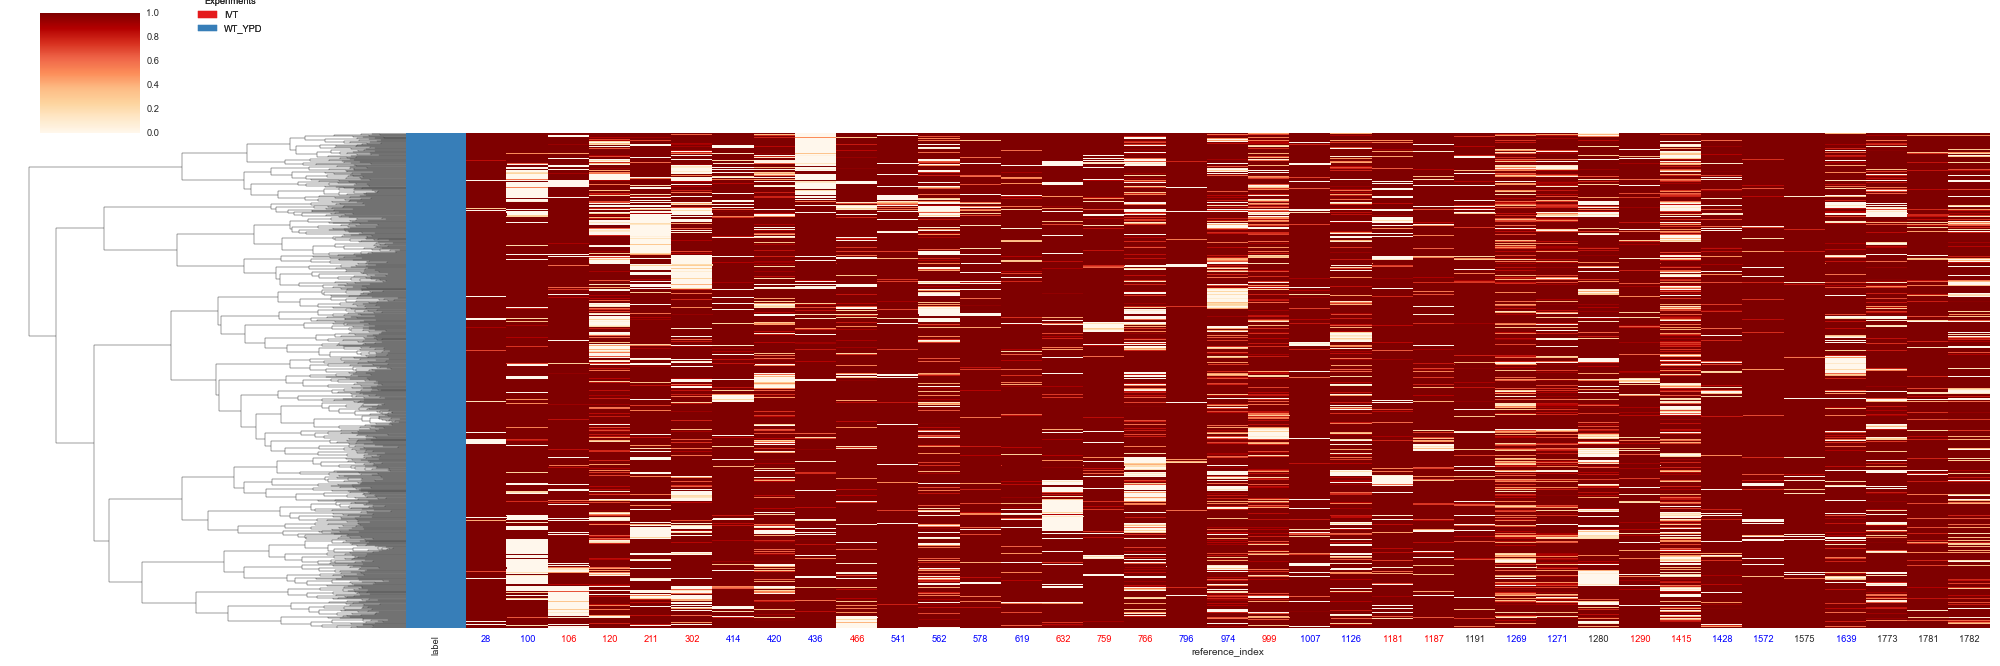

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


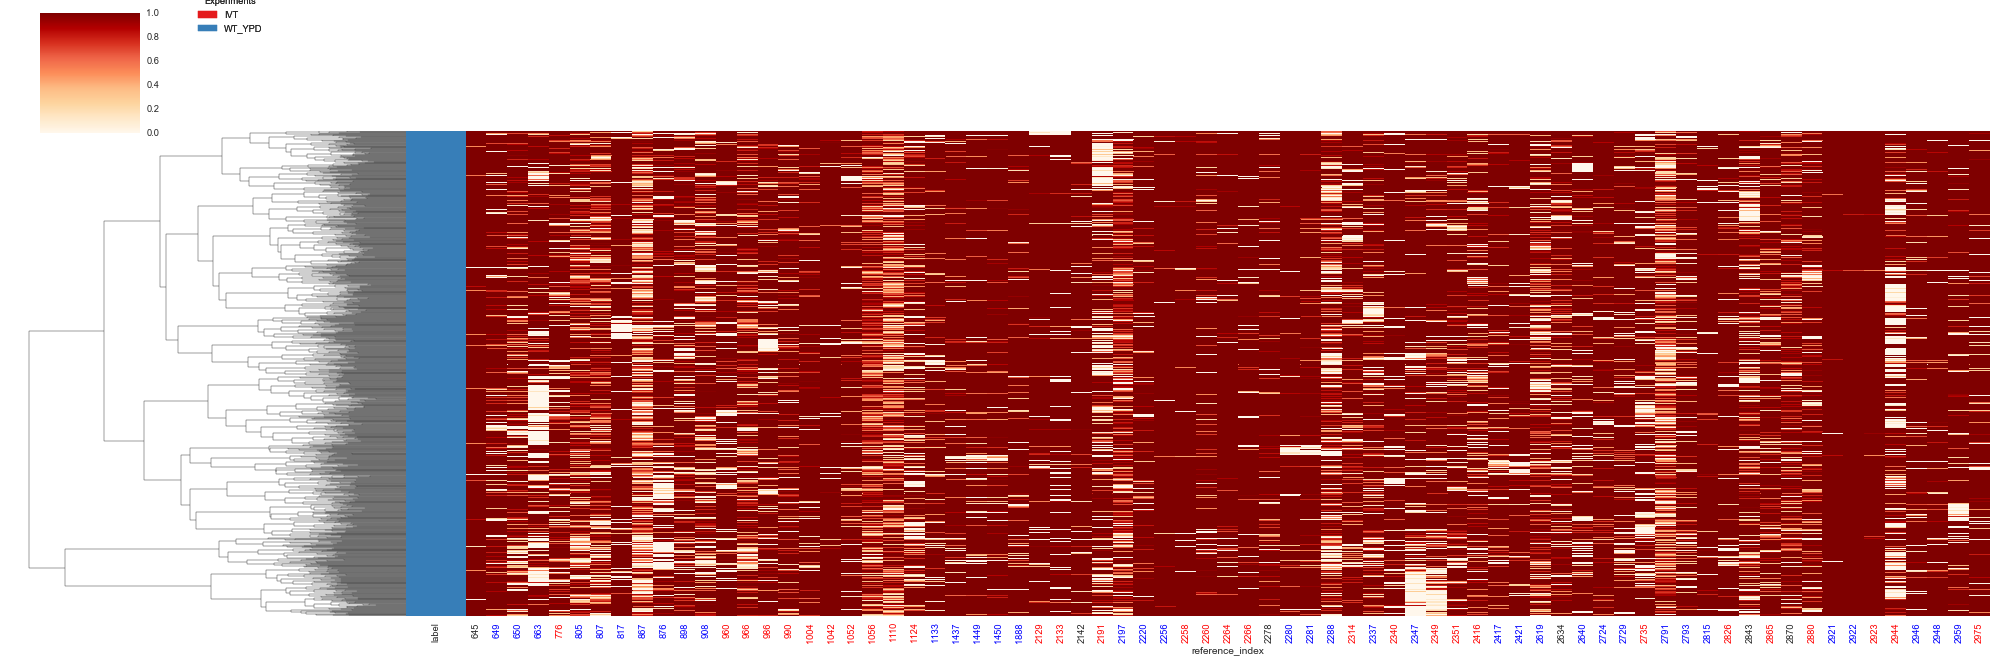

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


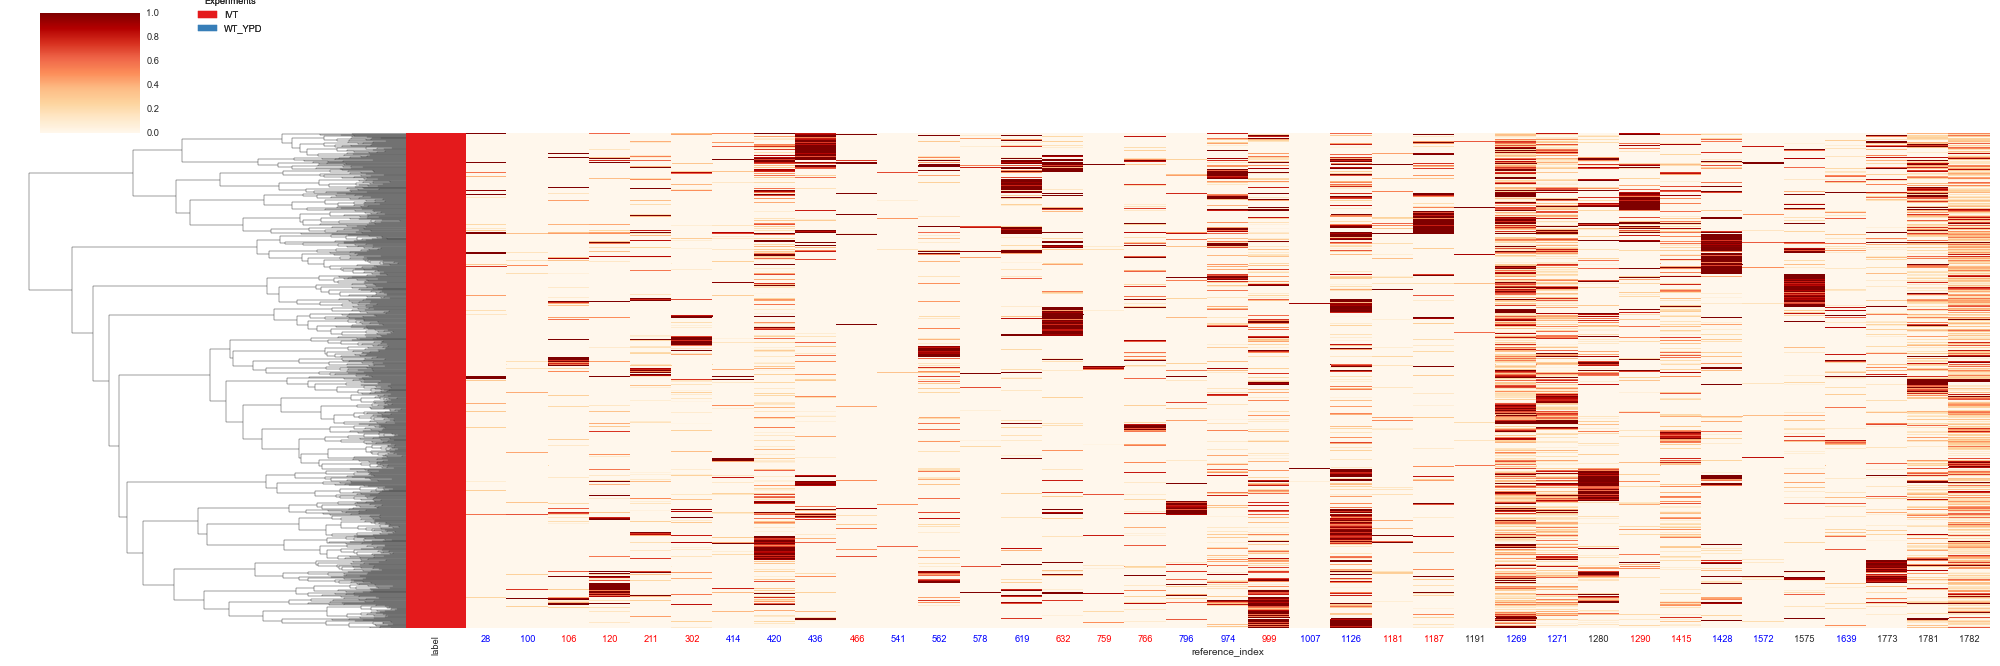

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


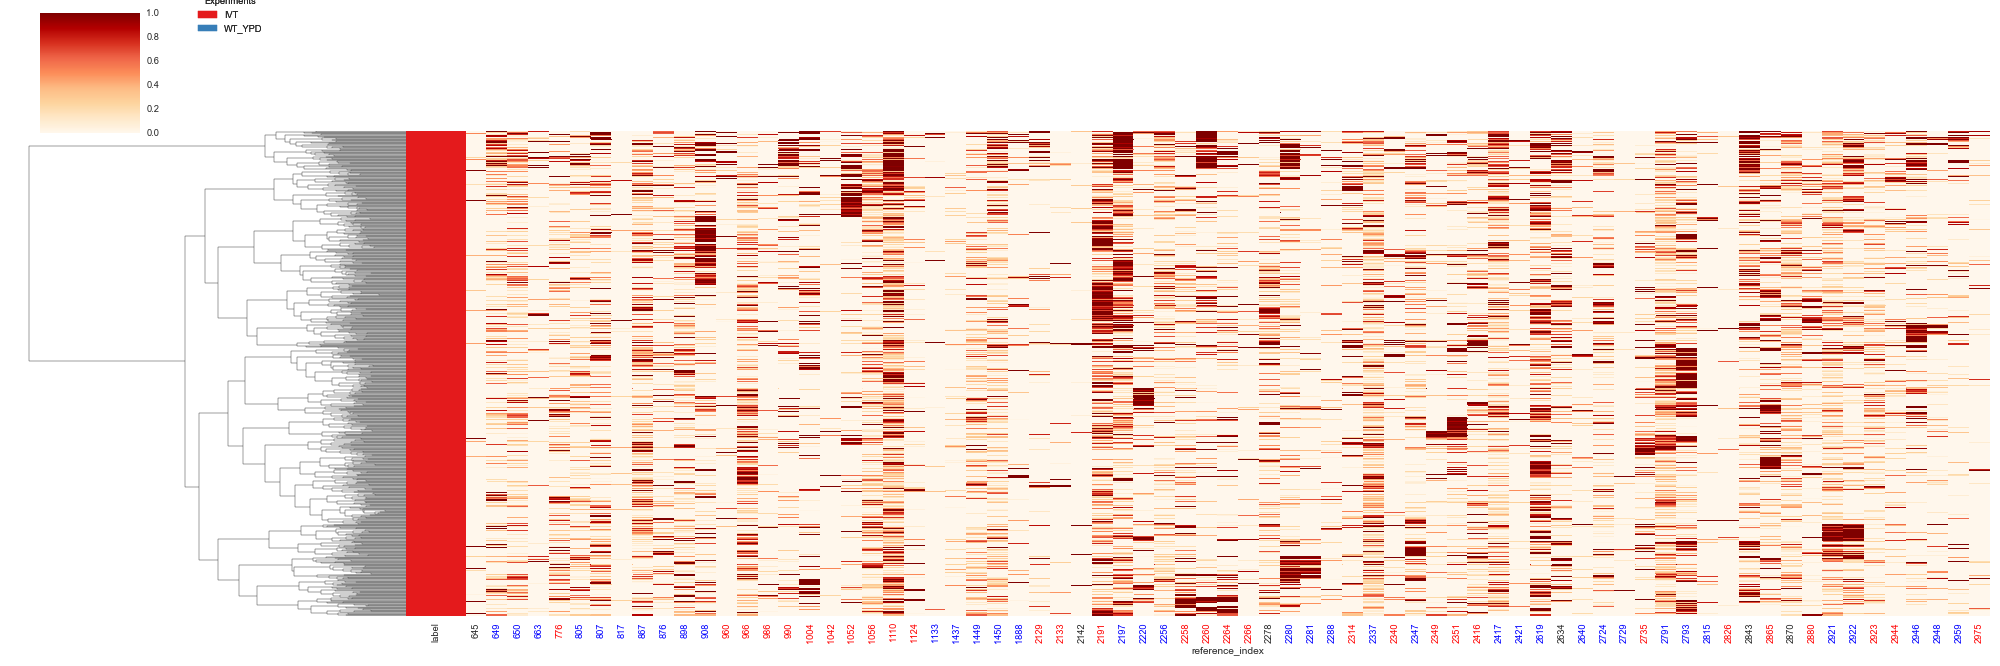

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [7]:
%matplotlib notebook

n = 1000
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = True
method = "ward"

label = None
contig = 'RDN18-1'
contigs = ['RDN18-1', 'RDN25-1']
Path("figures/wt_ivt_environment_conditions").mkdir(parents=True, exist_ok=True)

for label in all_labels:
    for contig in contigs:
    #     save_fig_path = None
        save_fig_path = f"figures/wt_ivt_environment_conditions/{contig}_{label}_dendrogram.png"
        g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                                       metric=metric,
                                       method=method, 
                                       label=label,
                                       col_cluster=False,
                                       row_cluster=True,
                                       twoprimeo_pos=None,
                                       pseduo_u_pos=None,
                                       legend=legend,
                                       figsize=figsize)


In [14]:
corr = pd.read_csv("figures/summary_data/all_experiment_correlations.csv")
all_labels = [x for x in corr.columns if "corr" in x]
all_pvalues = [x for x in corr.columns if "pvalue" in x]


wt_corr = corr["WT_YPD_corr"].sort_values(ascending=False)

In [20]:
for i in range(30):
    wt_corr.iloc[i]

In [21]:
wt_corr.iloc[i]

0.1707852946406314

In [38]:
for i in range(len(corr)):
# for i in range(10):
    data = corr["WT_YPD_corr"].iloc[i]
    pvalues = corr["WT_YPD_pvalue"].iloc[i]

    outside_3_div = data[((data > 0.15) | (data < -0.1)) & (pvalues < .001)]
    if len(outside_3_div) > 0:
        indexes = corr[["ref_index1", "ref_index2", "contig"]].iloc[i]
        if (indexes[1] - indexes[0]) > 5:
            print(i, list(corr[["ref_index1", "ref_index2", "contig"]].iloc[i]), outside_3_div)
#             print(outside_3_div)


42 [100, 436, 'RDN18-1'] [0.16106617]
138 [211, 302, 'RDN18-1'] [0.1588082]
414 [632, 766, 'RDN18-1'] [0.18802187]
1263 [876, 966, 'RDN25-1'] [0.15344594]
1270 [876, 1110, 'RDN25-1'] [-0.14104994]
2023 [1437, 1449, 'RDN25-1'] [0.41574176]
2024 [1437, 1450, 'RDN25-1'] [0.41462524]
2206 [2129, 2142, 'RDN25-1'] [0.21097798]
2451 [2256, 2266, 'RDN25-1'] [0.17314102]
2591 [2266, 2280, 'RDN25-1'] [0.15582744]
2592 [2266, 2281, 'RDN25-1'] [0.1561299]
3138 [2923, 2948, 'RDN25-1'] [0.17082265]
3291 [2922, 2948, 'RDN25-1'] [0.17132216]


In [52]:
import seaborn as sns

In [56]:
print(corr[(corr["ref_index1"] == 100) & (corr["ref_index2"] == 436)].index)
print(corr[(corr["ref_index1"] == 211) & (corr["ref_index2"] == 302)].index)
print(corr[(corr["ref_index1"] == 632) & (corr["ref_index2"] == 766)].index)
print(corr[(corr["ref_index1"] == 1437) & (corr["ref_index2"] == 1450)].index)
print(corr[(corr["ref_index1"] == 1437) & (corr["ref_index2"] == 1449)].index)
print(corr[(corr["ref_index1"] == 876) & (corr["ref_index2"] == 1110)].index)

Int64Index([42], dtype='int64')
Int64Index([138], dtype='int64')
Int64Index([414], dtype='int64')
Int64Index([2024], dtype='int64')
Int64Index([2023], dtype='int64')
Int64Index([1270], dtype='int64')


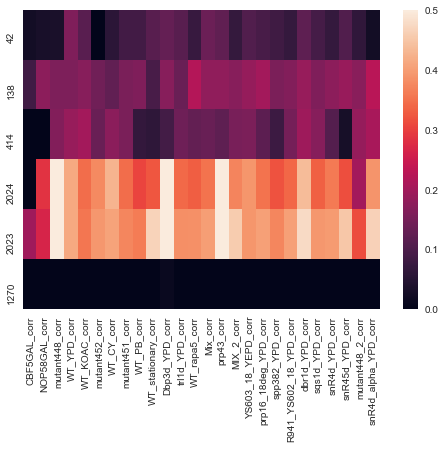

In [68]:
non_unusual = [x for x in corr.columns if "corr" in x and x not in ["NOP58GLU_corr", "CBF5GLU_corr", "IVT_corr"]]

sns.heatmap(corr.loc[[42, 138, 414, 2024, 2023, 1270]][non_unusual], vmin=0, vmax=0.5)
